# Hyperparamerter analysis

This notebook is driven by the question 'What are the best hyperparameters for the model?'.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
model_folder = '1_ccff'
#model_folder = '2_cff'
#model_folder = '3_cccff'
#model_folder = '4_cf'
main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'

model_name = model_folder.split('_')[-1]
df = pd.read_csv(os.path.join(main_path, model_folder, model_name+'_Hyperparameter.csv'))
df.describe()

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Time
count,2.020000e+02,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,1.000000e-03,175.762376,3.851485,16.356436,76.960396,89.090405,0.891937,32460.396040,1058.994645
std,6.521375e-19,67.999363,0.991367,5.589763,55.360406,0.680147,0.080801,20683.132163,973.319277
min,1.000000e-03,64.000000,3.000000,8.000000,8.000000,86.670017,0.664137,5000.000000,92.280049
25%,1.000000e-03,110.500000,3.000000,11.250000,34.250000,88.680005,0.881796,5000.000000,214.240825
50%,1.000000e-03,184.000000,3.000000,16.000000,65.000000,89.190009,0.921325,48000.000000,788.515771
75%,1.000000e-03,242.750000,5.000000,21.000000,104.750000,89.615002,0.941746,50000.000000,1632.678387
max,1.000000e-03,256.000000,5.000000,31.000000,255.000000,90.390009,0.949224,50000.000000,4494.435900


In [47]:
df.tail()

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Early_Stopped,Time,Title
197,0.001,181,3,11,42,89.310008,0.939924,50000,False,749.105994,Random_Plotting
198,0.001,126,3,15,242,87.180001,0.917281,50000,False,403.002825,Random_Plotting
199,0.001,123,3,12,255,88.240010,0.917115,50000,False,357.380398,Random_Plotting
200,0.001,71,5,22,180,89.240009,0.917109,50000,False,361.504083,Random_Plotting
201,0.001,186,5,23,67,88.890016,0.942097,50000,False,1369.521925,Random_Plotting


# Hyperparameter ordered by best auc-value

In [27]:
df.sort_values(by='Auc', ascending=False).head(10)

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Early_Stopped,Time,Title
57,0.001,169,5,9,32,90.600008,0.953443,50000,False,489.509731,Optimizing
8,0.001,139,5,11,17,89.930004,0.953414,100000,False,898.652810,Optimizing
6,0.001,83,3,14,43,90.490013,0.952812,100000,False,639.716341,Optimizing
59,0.001,253,3,5,24,90.000010,0.952101,50000,False,427.794354,Optimizing
9,0.001,64,5,19,77,89.730012,0.951122,100000,False,690.033698,Optimizing
34,0.001,137,3,8,9,90.350002,0.950717,50000,False,622.459063,Optimizing
50,0.001,206,3,11,28,90.460002,0.950304,50000,False,1029.781351,Optimizing
40,0.001,128,3,8,134,89.830005,0.949995,50000,False,607.488338,Optimizing
2,0.001,118,3,23,70,89.500010,0.949534,70000,True,805.677583,Optimizing
58,0.001,191,3,5,93,90.380013,0.949253,50000,False,362.182717,Optimizing


# Scattermatrix to compare every variable

In [4]:
def plotScattermatrix(df):
    plt.style.use('seaborn-ticks')
    pd.scatter_matrix(df[df['Auc']>0.8][['Hidden_Nodes', 'Depth', 'Patch_Size', 'Batch_Size', 'Accuracy', 'Auc']], alpha=1.0, figsize=(10, 10), c='b', diagonal='kde')
    plt.show()
    
def plotCorrelation(df):
    plt.style.use('seaborn-white')
    f, ax = plt.subplots(figsize=(12, 3))
    corr = df[['Hidden_Nodes', 'Depth', 'Patch_Size', 'Batch_Size', 'Accuracy', 'Auc']].corr()
    sns.heatmap(corr.tail(2), mask=np.zeros_like(corr.tail(2), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
    plt.show()

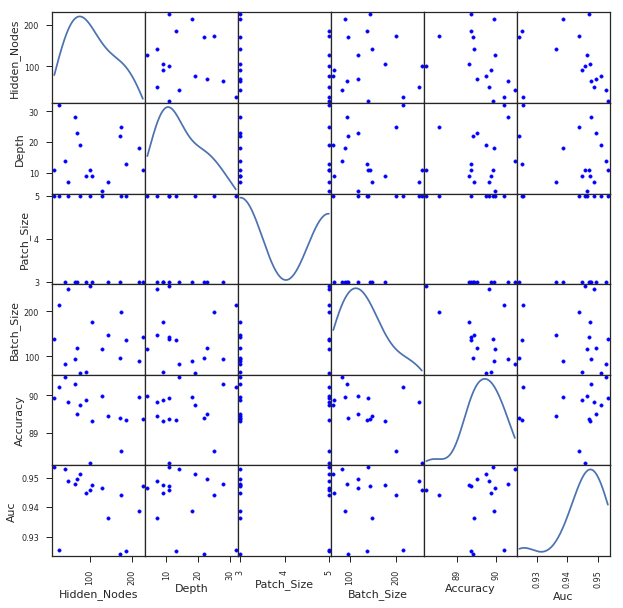

Correlation - All CNNs


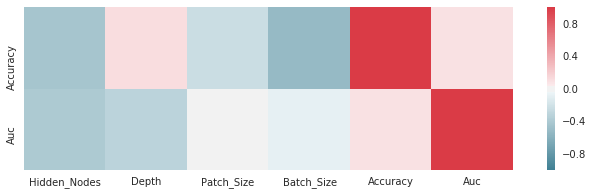

In [5]:
plotScattermatrix(df[df['Steps']>=50000])
print('Correlation - All CNNs')
plotCorrelation(df[df['Steps']>=50000])

In [6]:
for column in ['Patch_Size']:
    mean = df[df['Auc']>0.8].groupby(column)['Auc'].mean().sort_values(ascending=False)
    print(mean)

Patch_Size
3    0.943106
5    0.942868
Name: Auc, dtype: float64


In [63]:
main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'
for name in ['1_ccff', '2_cff', '3_cccff', '4_cf', '5_ccf', '6_cccf']:
    model_name = name.split('_')[-1]
    df = pd.read_csv(os.path.join(main_path, name, model_name+'_Hyperparameter.csv'))
    print(name, df[df['Title']=='Random_Plotting'].shape)

1_ccff (47, 11)
2_cff (50, 11)
3_cccff (16, 11)
4_cf (50, 11)
5_ccf (6, 11)
6_cccf (3, 11)
